In [ ]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

Comparision of Monte-Carlo and GUM methods of Error Propagation

C=b1xAbs +b0

b1 and b0 are linear regression coefficients

In [ ]:
# Define all constants and unsertenties
b1=30.1295
u_b1=0.044
b0=-0.802
u_b0=0.03
Abs=1.5156666666666665
u_abs=0.039



In [ ]:
#Find the combined unsertenty using error propagation method

mean_C = b1 * Abs + b0

sigma_C =  np.sqrt((Abs*u_b1)**2 + (b1*u_abs)**2 + (u_b0)**2) # calculated using this appoach of error propagation https://en.wikipedia.org/wiki/Propagation_of_uncertainty
print(mean_C, sigma_C)

44.86427883333333 1.1773237212978827


We can also compute this using Monte-Carlo error propagation. We sample N initial values that are drawn from the initial distributions:

In [ ]:
N = 1000000
b1_dist = np.random.normal(b1, u_b1, N)
b0_dist = np.random.normal(b0, u_b0, N)
Abs_dist = np.random.normal(Abs, u_abs, N)

and for each sample, we can compute the final value:

In [ ]:
C=b1_dist*Abs_dist + b0_dist

print(C.mean(), C.std())

44.86534019869552 1.1772625757835493


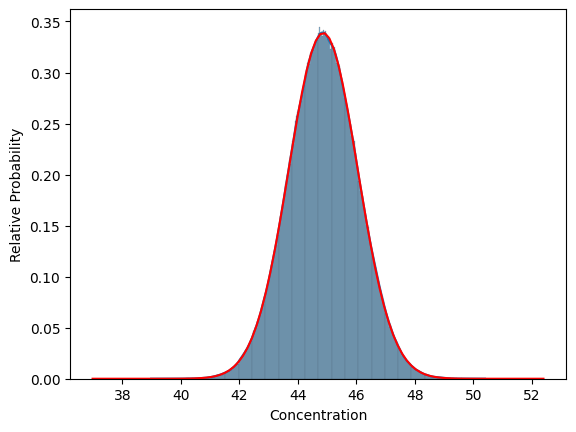

In [ ]:
from scipy.stats import norm
density_c = np.linspace(
    C.min() - 2, C.max() + 2, 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty dataframe
density_pdf = norm.pdf(density_c, mean_C, sigma_C) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(C, ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density_c, density_pdf , color="red") # plot the pdf of the normal distribution
#plt.title("Normal Distribution") # set the title
plt.xlabel("Concentration")
plt.ylabel("Relative Probability")
plt.show() # display the plot



The two agree very nicely. Now let's repeat this, but with larger initial errors:

The distribution of the sampled values agrees well with that found from standard error propagation. We can now repeat the experiment with larger uncertainties:


In [ ]:
# Define all constants and unsertenties
b1=30.1295
u_b1_2=7.044
b0=-0.802
u_b0_2=0.03
Abs=1.5156666666666665
u_abs_2=0.5

#Find the combined unsertenty using error propagation method

mean_C2 = b1 * Abs + b0

sigma_C2 =  np.sqrt((Abs*u_b1_2)**2 + (b1*u_abs_2)**2 + (u_b0_2)**2)
print(mean_C2, sigma_C2)

44.86427883333333 18.464348621092377


In [ ]:
N = 1000000
b1_dist2 = np.random.normal(b1, u_b1_2, N)
b0_dist2 = np.random.normal(b0, u_b0_2, N)
Abs_dist2 = np.random.normal(Abs, u_abs_2, N)

In [ ]:
C2=b1_dist2*Abs_dist2 + b0_dist2

print(C2.mean(), C2.std())

44.89154323602522 18.828569977679333


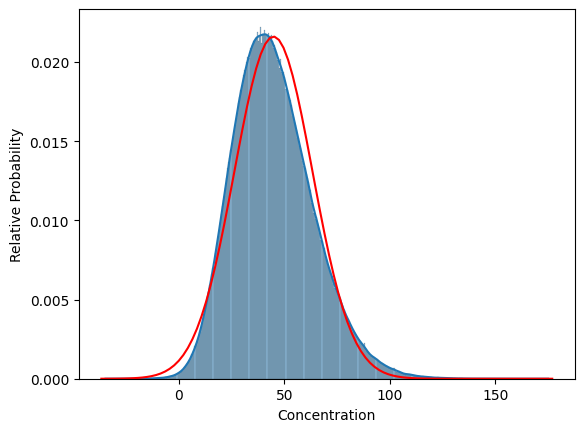

In [ ]:
density_c2 = np.linspace(
    C2.min() - 2, C2.max() + 2, 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty dataframe
density_pdf2 = norm.pdf(density_c2, mean_C2, sigma_C2) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(C2, ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density_c2, density_pdf2 , color="red") # plot the pdf of the normal distribution
#plt.title("Normal Distribution") # set the title
plt.xlabel("Concentration")
plt.ylabel("Relative Probability")
plt.show() # display the plot